In [33]:
import pandas as pd


csv_file_path = 'data/Clarity_Export_2023-11-14_133501.csv'

# Custom function to convert glucose values, replacing 'Low' with 40
def convert_glucose(value):
    if value == 'Low':
        return 40
    else:
        return int(value)

# Reading the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, 
                 parse_dates=['date_time'],
                 dtype={'series_id': int},
                 converters={'Glucose Value (mg/dL)': convert_glucose})

# Displaying the first few rows of the DataFrame
print(df.head())

   Index           date_time Event Type Event Subtype  Patient Info  \
0     19 2023-11-01 00:02:33        EGV           NaN           NaN   
1     20 2023-11-01 00:07:33        EGV           NaN           NaN   
2     21 2023-11-01 00:12:33        EGV           NaN           NaN   
3     22 2023-11-01 00:17:32        EGV           NaN           NaN   
4     23 2023-11-01 00:22:33        EGV           NaN           NaN   

   Device Info Source Device ID  Glucose Value (mg/dL)  Insulin Value (u)  \
0          NaN       android G6                    190                NaN   
1          NaN       android G6                    190                NaN   
2          NaN       android G6                    188                NaN   
3          NaN       android G6                    197                NaN   
4          NaN       android G6                    200                NaN   

   Carb Value (grams)  Duration (hh:mm:ss)  \
0                 NaN                  NaN   
1                 

In [34]:
## only EGV events
filtered_df = df[df['Event Type'] == 'EGV']
columns_to_keep = ['date_time','Glucose Value (mg/dL)']
filtered_df = df[columns_to_keep]

In [35]:
filtered_df

,date_time,Glucose Value (mg/dL)
0,2023-11-01 00:02:33,190
1,2023-11-01 00:07:33,190
2,2023-11-01 00:12:33,188
3,2023-11-01 00:17:32,197
4,2023-11-01 00:22:33,200
...,...,...
3713,2023-11-14 06:16:56,89
3714,2023-11-14 06:21:55,91
3715,2023-11-14 06:26:55,94
3716,2023-11-14 06:31:56,93


In [36]:
## We had to pick the week where the time changed..

duplicates = filtered_df['date_time'].duplicated(keep=False)

# If duplicates are found, print them
if duplicates.any():
    print(f"Found {duplicates.sum()} duplicate datetime entries.")
    # Print the duplicate rows
    print(filtered_df[duplicates])
else:
    print("No duplicate entries found.")

Found 24 duplicate datetime entries.
               date_time  Glucose Value (mg/dL)
1081 2023-11-05 01:01:20                     80
1082 2023-11-05 01:01:20                     92
1083 2023-11-05 01:06:20                     82
1084 2023-11-05 01:06:20                     93
1085 2023-11-05 01:11:20                     92
1086 2023-11-05 01:11:20                     84
1087 2023-11-05 01:16:20                     83
1088 2023-11-05 01:16:20                     85
1089 2023-11-05 01:21:20                     76
1090 2023-11-05 01:21:20                     82
1091 2023-11-05 01:26:20                     81
1092 2023-11-05 01:26:20                     75
1093 2023-11-05 01:31:20                     81
1094 2023-11-05 01:31:20                     80
1095 2023-11-05 01:36:20                     81
1096 2023-11-05 01:36:20                     84
1097 2023-11-05 01:41:20                     79
1098 2023-11-05 01:41:20                     88
1099 2023-11-05 01:46:20                     77
110

In [37]:
filtered_df = filtered_df.drop_duplicates(subset='date_time')

In [38]:
## cleaned data from Dexcom with duplicates removed (due to Daylight Savings Time)
filtered_df.to_csv('data/00_raw_data_cleaned.csv', index=False)

In [39]:
df = pd.read_csv('data/00_raw_data_cleaned.csv', 
                 parse_dates=['date_time'])
df.rename(columns={'Glucose Value (mg/dL)':"glucose_value"}, inplace=True)
df['date_time'] = df['date_time'].dt.strftime('%Y-%m-%d %H:%M')

In [40]:
df

,date_time,glucose_value
0,2023-11-01 00:02,190
1,2023-11-01 00:07,190
2,2023-11-01 00:12,188
3,2023-11-01 00:17,197
4,2023-11-01 00:22,200
...,...,...
3701,2023-11-14 06:16,89
3702,2023-11-14 06:21,91
3703,2023-11-14 06:26,94
3704,2023-11-14 06:31,93


In [41]:
bolus = pd.read_csv('data/meals_bolus.csv')

In [42]:
bolus['date_time'] = pd.to_datetime(bolus['date'] + ' ' + bolus['time'])


In [43]:
bolus

,series_id,date,time,carbs,bolus,date_time
0,1,2023-11-04,8:03,30,1.30,2023-11-04 08:03:00
1,1,2023-11-04,8:20,9,0.35,2023-11-04 08:20:00
2,1,2023-11-04,12:42,42,2.40,2023-11-04 12:42:00
3,1,2023-11-04,15:09,0,0.25,2023-11-04 15:09:00
4,1,2023-11-04,16:30,0,0.40,2023-11-04 16:30:00
...,...,...,...,...,...,...
80,1,2023-11-12,13:20,66,2.45,2023-11-12 13:20:00
81,1,2023-11-12,16:55,0,0.35,2023-11-12 16:55:00
82,1,2023-11-12,17:30,55,1.95,2023-11-12 17:30:00
83,1,2023-11-12,21:50,0,0.75,2023-11-12 21:50:00


In [44]:
df['date_time'] = pd.to_datetime(df['date_time'])
bolus['date_time'] = pd.to_datetime(bolus['date_time'])

# Add columns for 'carbs' and 'bolus' to df
df['carbs'] = None
df['bolus'] = None

# Iterate through df and find nearest in bolus
used_bolus_indices = set()  # To keep track of used bolus records
for i, row in df.iterrows():
    # Find the nearest time in bolus
    time_diff = abs(bolus['date_time'] - row['date_time'])
    nearest_idx = time_diff.idxmin()

    # Check if this bolus record is already used
    if nearest_idx not in used_bolus_indices:
        df.at[i, 'carbs'] = bolus.at[nearest_idx, 'carbs']
        df.at[i, 'bolus'] = bolus.at[nearest_idx, 'bolus']
        used_bolus_indices.add(nearest_idx)

# Fill missing values in 'carbs' and 'bolus' columns with 0
df['carbs'] = df['carbs'].fillna(0)
df['bolus'] = df['bolus'].fillna(0)

print(df)


               date_time  glucose_value  carbs  bolus
0    2023-11-01 00:02:00            190     30    1.3
1    2023-11-01 00:07:00            190      0    0.0
2    2023-11-01 00:12:00            188      0    0.0
3    2023-11-01 00:17:00            197      0    0.0
4    2023-11-01 00:22:00            200      0    0.0
...                  ...            ...    ...    ...
3701 2023-11-14 06:16:00             89      0    0.0
3702 2023-11-14 06:21:00             91      0    0.0
3703 2023-11-14 06:26:00             94      0    0.0
3704 2023-11-14 06:31:00             93      0    0.0
3705 2023-11-14 06:36:00             87      0    0.0

[3706 rows x 4 columns]


In [45]:
df.to_csv('data/01_data_with_carbs_and_bolus.csv', index=False)

In [46]:
df['date_time'] = pd.to_datetime(df['date_time'])

## Cut off data where I had no bolus / carb counts
start_date = pd.Timestamp('2023-11-04')
end_date = pd.Timestamp('2023-11-13')

# Filter the dataframe
df_filtered = df[(df['date_time'] >= start_date) & (df['date_time'] <= end_date)]

print(df_filtered)

               date_time  glucose_value  carbs  bolus
832  2023-11-04 00:02:00            195      0    0.0
833  2023-11-04 00:07:00            201      0    0.0
834  2023-11-04 00:12:00            203      0    0.0
835  2023-11-04 00:17:00            192      0    0.0
836  2023-11-04 00:22:00            151      0    0.0
...                  ...            ...    ...    ...
3357 2023-11-12 23:36:00            258      0    0.0
3358 2023-11-12 23:41:00            259      0    0.0
3359 2023-11-12 23:46:00            260      0    0.0
3360 2023-11-12 23:51:00            261      0    0.0
3361 2023-11-12 23:56:00            258      0    0.0

[2530 rows x 4 columns]


In [47]:
df_filtered.to_csv('data/02_data_with_carbs_and_bolus_date_filtered.csv', index=False)

In [48]:
df = df_filtered

In [49]:
df.set_index('date_time', inplace=True)

# Count Current Observations
current_obs_count = len(df)

# Identify Gaps in Data
# calculate the time differences
df['time_diff'] = df.index.to_series().diff().dt.total_seconds().div(60)  # Calculate time difference in minutes
gaps = df[df['time_diff'] > 5]  # Rows where gap is more than 5 minutes

# Resample the 'glucose_value' column with 5-minute intervals, interpolating missing values
resampled_glucose = df['glucose_value'].resample('5T').mean().interpolate(method='linear')

# Resample the 'carbs' and 'bolus' columns with 5-minute intervals, filling missing values with 0
resampled_carbs = df['carbs'].resample('5T').sum().fillna(0)
resampled_bolus = df['bolus'].resample('5T').sum().fillna(0)

# Combine resampled columns into one DataFrame
resampled_df = pd.DataFrame({
    'glucose_value': resampled_glucose,
    'carbs': resampled_carbs,
    'bolus': resampled_bolus
})

# Count New Observations After Resampling
new_obs_count = len(resampled_df)

print(f"Original Observation Count: {current_obs_count}")
print(f"New Observation Count After Resampling: {new_obs_count}")
print(f"Gaps Identified (First 5): \n{gaps.head()}")


Original Observation Count: 2530
New Observation Count After Resampling: 2592
Gaps Identified (First 5): 
                     glucose_value  carbs  bolus  time_diff
date_time                                                  
2023-11-04 00:37:00            110      0    0.0       10.0
2023-11-04 01:57:00            162      0    0.0       25.0
2023-11-04 02:17:00            133      0    0.0       20.0
2023-11-04 02:47:00            187      0    0.0       30.0
2023-11-04 04:52:00            108      0    0.0       55.0


/var/folders/ht/yjmm7jss4y96_2zdcw1vzrmm0000gn/T/ipykernel_68093/2096084402.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_diff'] = df.index.to_series().diff().dt.total_seconds().div(60)  # Calculate time difference in minutes


In [50]:
resampled_df_interpolated = resampled_df

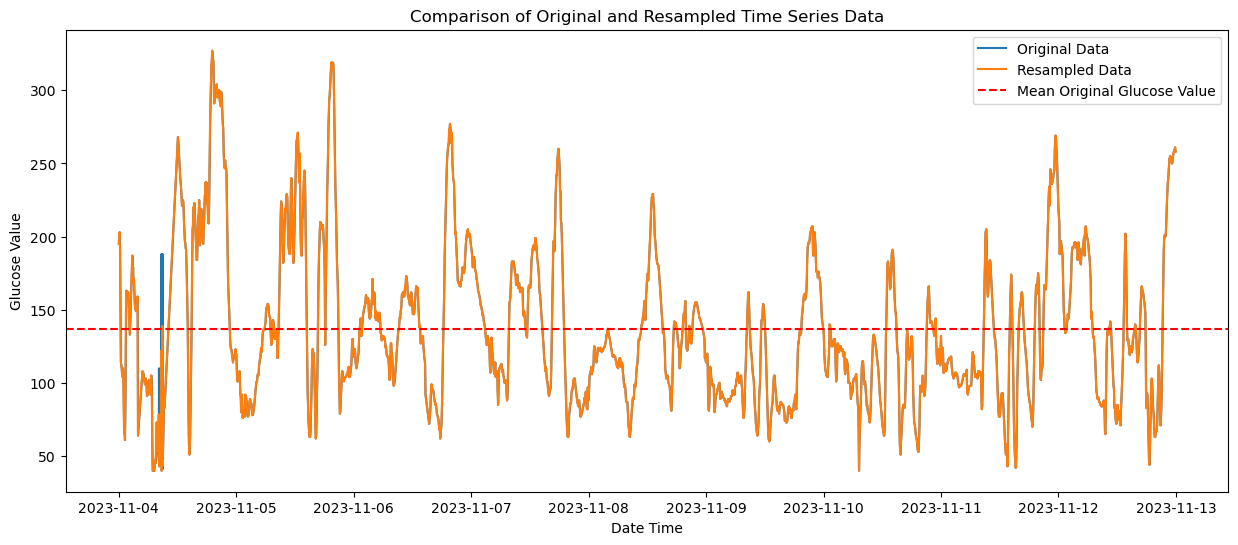

In [51]:
import matplotlib.pyplot as plt

# Resetting index for plotting
original_for_plot = df.reset_index()
resampled_for_plot = resampled_df_interpolated.reset_index()

mean_glucose = original_for_plot['glucose_value'].mean()


# Creating the plot
plt.figure(figsize=(15, 6))
plt.plot(original_for_plot['date_time'], original_for_plot['glucose_value'], label='Original Data')
plt.plot(resampled_for_plot['date_time'], resampled_for_plot['glucose_value'], label='Resampled Data')

plt.axhline(y=mean_glucose, color='r', linestyle='--', label='Mean Original Glucose Value')

# Adding titles and labels
plt.title('Comparison of Original and Resampled Time Series Data')
plt.xlabel('Date Time')
plt.ylabel('Glucose Value')
plt.legend()


plt.show()


In [52]:
resampled_df_interpolated['glucose_value']=resampled_df_interpolated['glucose_value'].round(0)
resampled_df_interpolated['carbs']=resampled_df_interpolated['carbs'].round(0)
resampled_df_interpolated['bolus']=resampled_df_interpolated['bolus'].round(2)


In [53]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(resampled_df_interpolated['glucose_value'], regression='c')

print('KPSS Statistic: %f' % kpss_result[0])
print('p-value: %f' % kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS Statistic: 0.724680
p-value: 0.011302
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


In [54]:
resampled_df_interpolated.to_csv('data/03_data_resampled.csv', index=True)


In [55]:
df = pd.read_csv('data/03_data_resampled.csv')

In [56]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [57]:
# Create decacy function for insulin on board, linear decay at 25% per hour

def calculate_iob(row, df):
    current_time = row['date_time']
    four_hours_ago = current_time - pd.Timedelta(hours=4)

    # Filter the dataframe for the last 4 hours
    relevant_rows = df[(df['date_time'] > four_hours_ago) & (df['date_time'] <= current_time)]

    # Initialize IOB
    iob = 0

    # Loop through each hour and calculate the decayed insulin
    for i in range(4):
        start_time = current_time - pd.Timedelta(hours=i+1)
        end_time = current_time - pd.Timedelta(hours=i)
        hourly_rows = relevant_rows[(relevant_rows['date_time'] > start_time) & (relevant_rows['date_time'] <= end_time)]
        
        # Calculate the total bolus for the hour and apply decay
        total_bolus = hourly_rows['bolus'].sum()
        decayed_bolus = total_bolus * (1 - 0.25 * i)
        iob += decayed_bolus

    return iob


In [58]:
df['insulin_on_board'] = df.apply(lambda row: calculate_iob(row, df), axis=1)


In [59]:
df

,date_time,glucose_value,carbs,bolus,insulin_on_board
0,2023-11-04 00:00:00,195.0,0,0.0,0.0000
1,2023-11-04 00:05:00,201.0,0,0.0,0.0000
2,2023-11-04 00:10:00,203.0,0,0.0,0.0000
3,2023-11-04 00:15:00,192.0,0,0.0,0.0000
4,2023-11-04 00:20:00,151.0,0,0.0,0.0000
...,...,...,...,...,...
2587,2023-11-12 23:35:00,258.0,0,0.0,0.5250
2588,2023-11-12 23:40:00,259.0,0,0.0,0.3375
2589,2023-11-12 23:45:00,260.0,0,0.0,0.3375
2590,2023-11-12 23:50:00,261.0,0,0.0,0.3375


In [60]:
df['date_time'] = pd.to_datetime(df['date_time'])

def calculate_glucose_trend(df, periods=4):
    # Ensure 'date_time' is a datetime column
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    # Sort the dataframe by datetime
    df = df.sort_values('date_time').reset_index(drop=True)
    
    # Initialize a new column for glucose trend
    df['glucose_trend_20'] = None
    
    # Iterate over the DataFrame rows
    for i in range(len(df)):
        # Calculate the maximum number of periods available for this row (up to 4)
        max_periods = min(periods, i + 1)
        
        # Calculate the glucose value from available observations earlier
        glucose_diff = df['glucose_value'].iloc[i] - df['glucose_value'].iloc[i - max_periods + 1]
        
        # Calculate the slope as the change in glucose value over the available observations
        slope = glucose_diff / (max_periods - 1) if max_periods - 1 > 0 else glucose_diff
        
        # Assign the slope to the current row
        df.at[i, 'glucose_trend_20'] = slope
    
    return df

# Apply the function to calculate the glucose trend
df_with_trend = calculate_glucose_trend(df)


In [61]:
df_with_trend

,date_time,glucose_value,carbs,bolus,insulin_on_board,glucose_trend_20
0,2023-11-04 00:00:00,195.0,0,0.0,0.0000,0.0
1,2023-11-04 00:05:00,201.0,0,0.0,0.0000,6.0
2,2023-11-04 00:10:00,203.0,0,0.0,0.0000,4.0
3,2023-11-04 00:15:00,192.0,0,0.0,0.0000,-1.0
4,2023-11-04 00:20:00,151.0,0,0.0,0.0000,-16.666667
...,...,...,...,...,...,...
2587,2023-11-12 23:35:00,258.0,0,0.0,0.5250,1.666667
2588,2023-11-12 23:40:00,259.0,0,0.0,0.3375,1.333333
2589,2023-11-12 23:45:00,260.0,0,0.0,0.3375,1.0
2590,2023-11-12 23:50:00,261.0,0,0.0,0.3375,1.0


In [62]:
# create delta from last value, fill zeroes for no observations
df_with_trend['last_delta'] = df_with_trend['glucose_value'].diff()
df_with_trend['last_delta'] = df_with_trend['last_delta'].fillna(0)


In [63]:
df_with_trend['insulin_on_board'] = df_with_trend['insulin_on_board'].round(2)
df_with_trend['glucose_trend_20'] = df_with_trend['glucose_trend_20'].fillna(0)
df_with_trend['glucose_trend_20'] = df_with_trend['glucose_trend_20'].round(0)
df_with_trend

,date_time,glucose_value,carbs,bolus,insulin_on_board,glucose_trend_20,last_delta
0,2023-11-04 00:00:00,195.0,0,0.0,0.00,0.0,0.0
1,2023-11-04 00:05:00,201.0,0,0.0,0.00,6.0,6.0
2,2023-11-04 00:10:00,203.0,0,0.0,0.00,4.0,2.0
3,2023-11-04 00:15:00,192.0,0,0.0,0.00,-1.0,-11.0
4,2023-11-04 00:20:00,151.0,0,0.0,0.00,-17.0,-41.0
...,...,...,...,...,...,...,...
2587,2023-11-12 23:35:00,258.0,0,0.0,0.52,2.0,1.0
2588,2023-11-12 23:40:00,259.0,0,0.0,0.34,1.0,1.0
2589,2023-11-12 23:45:00,260.0,0,0.0,0.34,1.0,1.0
2590,2023-11-12 23:50:00,261.0,0,0.0,0.34,1.0,1.0


In [64]:

df_with_trend.to_csv('data/04_data_with_features.csv', index=False)
df_with_trend.to_csv('data/t1d_glucose_data.csv', index=False)